# MODELING - Regression 22/01

In [1]:

import numpy as np 
import pandas as pd 

import statsmodels.api as sm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn import metrics 
import xgboost as xgb




## Load Dataset

In [2]:
df = pd.read_csv('Data/DC_Prop_Condominium_Regression.csv', index_col= 'Unnamed: 0')
df.shape

(38707, 36)

Mendapatkan HARGA yang tidak diketahui ke DataFrame yang berbeda untuk prediksi

## Menentukan Feature dan Target

In [3]:
X=df.drop(['PRICE'],axis=1)
y=df['PRICE']

## Regresi untuk setiap model

In [4]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    print('Model Performance')
    print('R2:', metrics.r2_score(y_test, predictions))
    print('Mean_Absolute_Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean_Squared_Error:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### OLS Regression

In [84]:
#split into Test and Train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
model = sm.OLS(y_train, X_train.astype(float), hasconst=True).fit()
# Print out the statistics
#evaluate Accuracy
evaluate(model, X_test, y_test)
model.summary()



Model Performance
R2: 0.41364062269202073
Mean_Absolute_Error: 7.840637450173552
Mean_Squared_Error: 188.8599961354754
RMSE: 13.74263425022566


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     935.1
Date:                Fri, 28 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:43:19   Log-Likelihood:            -1.2455e+05
No. Observations:               30965   AIC:                         2.492e+05
Df Residuals:                   30939   BIC:                         2.494e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
BATHRM                  3.5317      0.231     15.298      0.000       3.079       3.984
HF_BATHRM              -0.3948      0.252     -1.565      0.118      -0.889       0.100
ROOMS                  -1.1566      0.145     -7.982      0.000      -1.441      -0.873
BEDRM                   1.3419      0.209      6.411      0.000       0.932       1.752
AYB                     0.0366      0.004     10.276      0.000       0.030       0.044
YR_RMDL                -0.0374      0.004     -8.694      0.000      -0.046      -0.029
EYB                     0.0971      0.005     21.081      0.000       0.088       0.106
SALE_NUM                1.7349      0.060     28.901      0.000       1.617       1.853
FIREPLACES             -0.0087      0.015     -0.595      0.552      -0.037       0.020
USECODE                -5.2007      0.214    -24.286      0.000      -5.620      -4.781
LANDAREA               -0.0098      0.000    -37.982      0.000      -0.010      -0.009
LIVING_GBA              0.0245      0.000     59.321      0.000       0.024       0.025
SalevYB                 0.0808      0.004     18.790      0.000       0.072       0.089
SalevYI                 0.0204      0.004      5.593      0.000       0.013       0.028
HEAT_Air-Oil        -5.581e-14   5.05e-15    -11.044      0.000   -6.57e-14   -4.59e-14
HEAT_Elec Base Brd    2.22e-13   2.09e-14     10.619      0.000    1.81e-13    2.63e-13
HEAT_Electric Rad    8.813e-14   8.55e-15     10.305      0.000    7.14e-14    1.05e-13
HEAT_Evp Cool       -9.218e-14    8.7e-15    -10.591      0.000   -1.09e-13   -7.51e-14
HEAT_Forced Air       -58.0957      5.453    -10.653      0.000     -68.784     -47.407
HEAT_Gravity Furnac -7.822e-14   7.27e-15    -10.766      0.000   -9.25e-14    -6.4e-14
HEAT_Hot Water Rad    -58.0429      5.472    -10.608      0.000     -68.767     -47.318
HEAT_Ht Pump          -55.8025      5.454    -10.232      0.000     -66.492     -45.113
HEAT_Ind Unit        2.464e-14   2.42e-15     10.161      0.000    1.99e-14    2.94e-14
HEAT_Wall Furnace    3.161e-13   2.97e-14     10.655      0.000    2.58e-13    3.74e-13
HEAT_Warm Cool        -61.2762      5.456    -11.232      0.000     -71.969     -50.583
HEAT_Water Base Brd -3.302e-13   3.09e-14    -10.680      0.000   -3.91e-13    -2.7e-13
AC_1                    3.3594      0.422      7.955      0.000       2.532       4.187
QUALIFIED_U             1.2040      0.184      6.553      0.000       0.844       1.564
WARD_Ward 2            -0.2424      0.238     -1.018      0.309      -0.709       0.224
WARD_Ward 3            -3.4083      0.283    -12.062      0.000      -3.962      -2.854
WARD_Ward 4            -7.6167      0.430    -17.714      0.000      -8.459      -6.774
WARD_Ward 5            -8.6484      0.365    -23.682      0.000      -9.364      -7.933
WAR

### LinearRegression

In [6]:
reg = LinearRegression().fit(X_test, y_test)
reg.score(X_test, y_test)

0.5097570791774684

In [17]:
drop_res = ['WARD_Ward 2', 'FIREPLACES', 'HEAT_Water Base Brd', 'HF_BATHRM']
#Drop insignificant variables and rerun the ols model
X_train_ols = X_train.drop(drop_res, axis =1)
X_test_ols = X_test.drop(drop_res, axis = 1)
model = sm.OLS(y_train, X_train_ols.astype(float), hasconst=True).fit()
# Print out the statistics
#evaluate Accuracy
evaluate(model, X_test_ols, y_test)
model.summary()

Model Performance
R2: 0.41442393394352817
Mean_Absolute_Error: 7.833795735013645
Mean_Squared_Error: 188.60770007667992
RMSE: 13.733451863121665


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1062.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:46:50   Log-Likelihood:            -1.2456e+05
No. Observations:               30965   AIC:                         2.492e+05
Df Residuals:                   30942   BIC:                         2.493e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
BATHRM                  3.5929      0.228     15.747      0.000       3.146       4.040
ROOMS                  -1.1694      0.145     -8.085      0.000      -1.453      -0.886
BEDRM                   1.3788      0.208      6.615      0.000       0.970       1.787
AYB                     0.0363      0.004     10.209      0.000       0.029       0.043
YR_RMDL                -0.0366      0.004     -8.584      0.000      -0.045      -0.028
EYB                     0.0964      0.005     21.002      0.000       0.087       0.105
SALE_NUM                1.7349      0.060     28.902      0.000       1.617       1.853
USECODE                -5.1876      0.210    -24.656      0.000      -5.600      -4.775
LANDAREA               -0.0098      0.000    -38.321      0.000      -0.010      -0.009
LIVING_GBA              0.0243      0.000     62.453      0.000       0.024       0.025
SalevYB                 0.0805      0.004     18.724      0.000       0.072       0.089
SalevYI                 0.0204      0.004      5.589      0.000       0.013       0.027
HEAT_Air-Oil         -1.22e-13   1.19e-14    -10.226      0.000   -1.45e-13   -9.86e-14
HEAT_Elec Base Brd   9.743e-16   1.83e-16      5.321      0.000    6.15e-16    1.33e-15
HEAT_Electric Rad     3.82e-14   3.44e-15     11.094      0.000    3.15e-14     4.5e-14
HEAT_Evp Cool       -1.232e-14   1.21e-15    -10.162      0.000   -1.47e-14   -9.94e-15
HEAT_Forced Air       -58.1227      5.453    -10.659      0.000     -68.810     -47.435
HEAT_Gravity Furnac  6.607e-15   6.09e-16     10.853      0.000    5.41e-15     7.8e-15
HEAT_Hot Water Rad    -58.0609      5.471    -10.612      0.000     -68.785     -47.337
HEAT_Ht Pump          -55.8519      5.453    -10.243      0.000     -66.540     -45.164
HEAT_Ind Unit       -8.111e-14   7.57e-15    -10.719      0.000   -9.59e-14   -6.63e-14
HEAT_Wall Furnace   -1.815e-13    1.7e-14    -10.706      0.000   -2.15e-13   -1.48e-13
HEAT_Warm Cool        -61.3257      5.455    -11.243      0.000     -72.017     -50.634
AC_1                    3.3200      0.422      7.871      0.000       2.493       4.147
QUALIFIED_U             1.2147      0.184      6.619      0.000       0.855       1.574
WARD_Ward 3            -3.2238      0.244    -13.204      0.000      -3.702      -2.745
WARD_Ward 4            -7.5001      0.416    -18.022      0.000      -8.316      -6.684
WARD_Ward 5            -8.5441      0.351    -24.329      0.000      -9.232      -7.856
WARD_Ward 6            -2.1910      0.227     -9.659      0.000      -2.636      -1.746
WARD_Ward 7           -15.9817      0.466    -34.266      0.000     -16.896     -15.068
WARD_Ward 8           -11.8004      0.447    -26.391      0.000     -12.677     -10.924
==============================================================================
Omnibus:    

### DecisionTreeRegressor

In [18]:
from sklearn.tree import DecisionTreeRegressor
#regressor = DecisionTreeRegressor(max_depth=15)
param_dist = {'max_depth': [1,20]}
#regressor.fit(X_train, y_train)
#regressor.score(X_train, y_train)
DTR = DecisionTreeRegressor()
DTR_cv = GridSearchCV(DTR, param_dist)
DTR_cv.fit(X_train, y_train)
evaluate(DTR_cv.best_estimator_, X_test, y_test)

Model Performance
R2: 0.7638203124935957
Mean_Absolute_Error: 4.57759431688683
Mean_Squared_Error: 76.07091588527462
RMSE: 8.721864243685213


### Hyperparamater Tunning

### RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

# Create the parameter distribution
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 20]}

RFR = RandomForestRegressor()
RFR_cv = RandomizedSearchCV(RFR, param_dist)
RFR_cv.fit(X_train, y_train)
evaluate(RFR_cv.best_estimator_, X_test, y_test)

Model Performance
R2: 0.8760406920171472
Mean_Absolute_Error: 3.6608780737855726
Mean_Squared_Error: 39.925948714386166
RMSE: 6.318698340195247


In [20]:
RFR_cv.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=277)

In [21]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
rf.feature_importances_

(35,)

In [32]:
df.columns

Index(['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'PRICE', 'SALE_NUM', 'FIREPLACES', 'USECODE', 'LANDAREA', 'LIVING_GBA',
       'SalevYB', 'SalevYI', 'HEAT_Air-Oil', 'HEAT_Elec Base Brd',
       'HEAT_Electric Rad', 'HEAT_Evp Cool', 'HEAT_Forced Air',
       'HEAT_Gravity Furnac', 'HEAT_Hot Water Rad', 'HEAT_Ht Pump',
       'HEAT_Ind Unit', 'HEAT_Wall Furnace', 'HEAT_Warm Cool',
       'HEAT_Water Base Brd', 'AC_1', 'QUALIFIED_U', 'WARD_Ward 2',
       'WARD_Ward 3', 'WARD_Ward 4', 'WARD_Ward 5', 'WARD_Ward 6',
       'WARD_Ward 7', 'WARD_Ward 8'],
      dtype='object')

In [42]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)


In [80]:
importances[0:9]

array([0.18627258, 0.00258045, 0.00627831, 0.00912355, 0.04747553,
       0.10878719, 0.08507182, 0.04706298, 0.00310651])

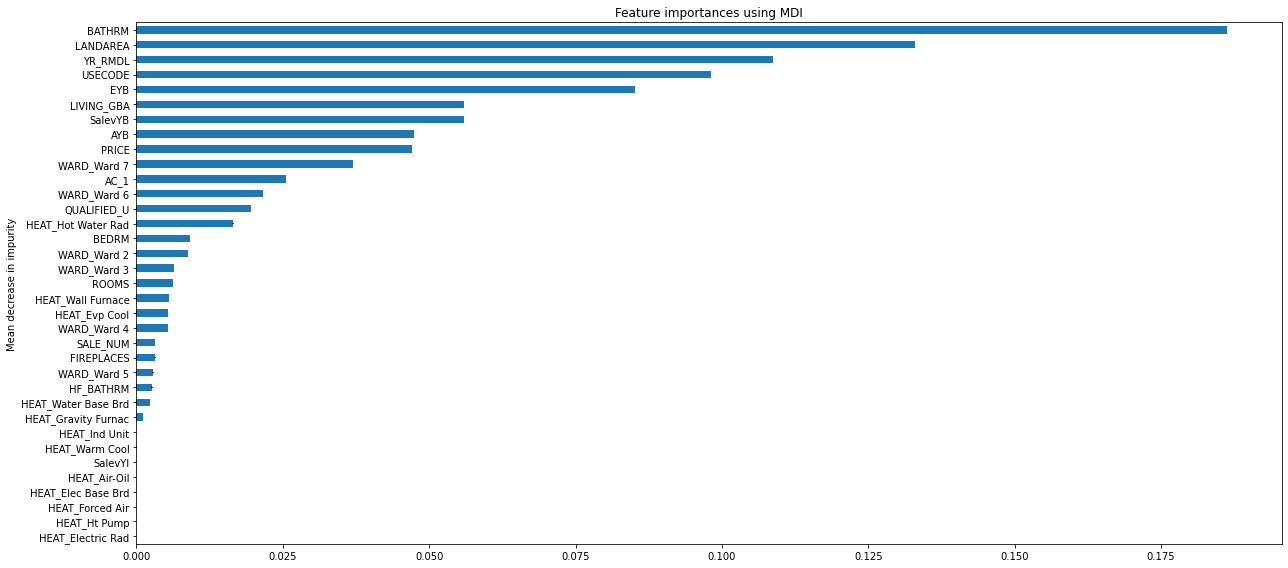

In [83]:
forest_importances = pd.Series(importances, index=df.columns[0:35])
sorted_idx = rf.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(18,8))
forest_importances.sort_values().plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [61]:
df.shape

(38707, 36)

### Adaptive Boosting Decision Tree

In [ ]:
rng = np.random.RandomState(1)
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 400, num = 10)]}


ada = AdaBoostRegressor(DecisionTreeRegressor(random_state = rng), random_state = rng)
ada_cv = RandomizedSearchCV(ada, param_dist)
ada_cv.fit(X_train, y_train)

evaluate(ada_cv.best_estimator_, X_test, y_test)

In [ ]:
#Obtaining the best estimators from the model
print(ada_cv.best_estimator_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x1BD0BAED040),
                  n_estimators=100,
                  random_state=RandomState(MT19937) at 0x1BD0BAED140)


### XGBRegressor

In [ ]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',max_depth = 5, min_child_weight = 1, colsample_bytree = 0.8)

In [ ]:
model = XGBRegressor()

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [ ]:
# fit a final xgboost model on the housing dataset and make a prediction
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
# load the dataset
# define model
model = XGBRegressor()
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_data = asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


param_dist = {"n_neighbors": [3, 7],
              "weights": ["uniform", "distance"]}

KNR = KNeighborsRegressor()

KNR_cv = RandomizedSearchCV(KNR, param_dist, cv=5)

KNR_cv.fit(X_train, y_train)
#KNR.score(X_train, y_train)

evaluate(KNR_cv.best_estimator_, X_test, y_test)

C:\Users\cbc-user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Performance
R2: 0.4565369943114388
Mean_Absolute_Error: 10.240782773909753
Mean_Squared_Error: 220.6165234480196
RMSE: 14.85316543528751


In [ ]:
KNR_cv.best_estimator_

KNeighborsRegressor(n_neighbors=7, weights='distance')

### SVR

In [ ]:
from sklearn.svm import SVR


param_dist = {"kernel": ["rbf", "linear", "poly"],
             "C": [1, 20]}

svr = SVR()
svr_cv = RandomizedSearchCV(svr, param_dist, cv=5)   
svr_cv.fit(X_train, y_train)
svr.fit(X_train, y_train)
evaluate(svr_cv.best_estimator_, X_test, y_test)
evaluate(svr, X_test, y_test)

C:\Users\cbc-user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
accuracy = evaluate(svr, X_test, y_test)

### Ridge

In [ ]:
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


param_grid = {'alpha': uniform()}
seed=6
model = Ridge()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed)
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

In [ ]:
evaluate(rsearch, X_test, y_test)

In [ ]:
rsearch.best_estimator_

In [ ]:
#Question 9 RIDGE REGRESSION
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import random
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
MSE=[]
xvalues=[]
for i in range (0,500):
    b=random.randint(1, 100000)
    xvalues.append(b*.0001)
    ridge1 = Ridge(alpha =b*.0001, normalize = True)
    ridge1.fit(X_train, y_train)             # Fit a ridge regression on the training data
    pred2 = ridge1.predict(X_test)           # Use this model to predict the test data
    #print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
    # Calculate the test MSE
    #print(b*.0001,mean_squared_error(y_test, pred2),'yes')
    MSE.append(mean_squared_error(y_test, pred2))
# with increase in shrinkage paramter , model is having a high MSE , this implies that ridge regression is not a suitable method

plt.scatter(xvalues,MSE)
plt.xlabel('Alpha for ridge regression')
plt.ylabel('MSE for ridge regression')
plt.title('MSE Vs Alpha RIDGE REGRESSION')

In [ ]:
from sklearn.linear_model import Lasso

# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
MSE=[]
xvalues=[]
import warnings
warnings.filterwarnings("ignore")
for i in range (0,100):
    b=random.randint(1,100000)
    xvalues.append(b*.0001)
    lasso1 = Lasso(alpha =b*.0001)
    lasso1.fit(X_train, y_train)             # Fit a ridge regression on the training data
    pred2 = lasso1.predict(X_test)           # Use this model to predict the test data
    #print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
    # Calculate the test MSE
    #print(b*.0001,mean_squared_error(y_test, pred2),'yes')
    MSE.append(mean_squared_error(y_test, pred2))
# with increase in shrinkage paramter , model is having a high MSE , this implies that LASSO regression is not a suitable method

plt.scatter(xvalues,MSE)
plt.xlabel('Alpha for LASSO regression')
plt.ylabel('MSE for LASSO regression')
plt.title('MSE Vs Alpha LASSO  REGRESSION')

### Other

In [ ]:
def diagnostic_plots(df,variabel): # fungsi def untuk memplot istribusi kolom di dataset airbnb
    #ukuran
    plt.figure(figsize=(32,10)) #ukuran kesamping dan kebawah
    #histogram
    plt.subplot(1,2,1) #row, kolom, index
    sns.distplot(df[variabel],bins=30) #distplot untuk memplot distribusi univariate dengan interval dibagi 30
    plt.title("Histogram") #titel/judul
    # Boxplot
    plt.subplot(1,2,2)#row,kolom,index
    sns.boxplot(y=df[variabel]) #menggunakan plot boxplot 
    plt.title("Boxplot") #titel/judul
    
    plt.show() #mengeluarkan

C:\Users\cbc-user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


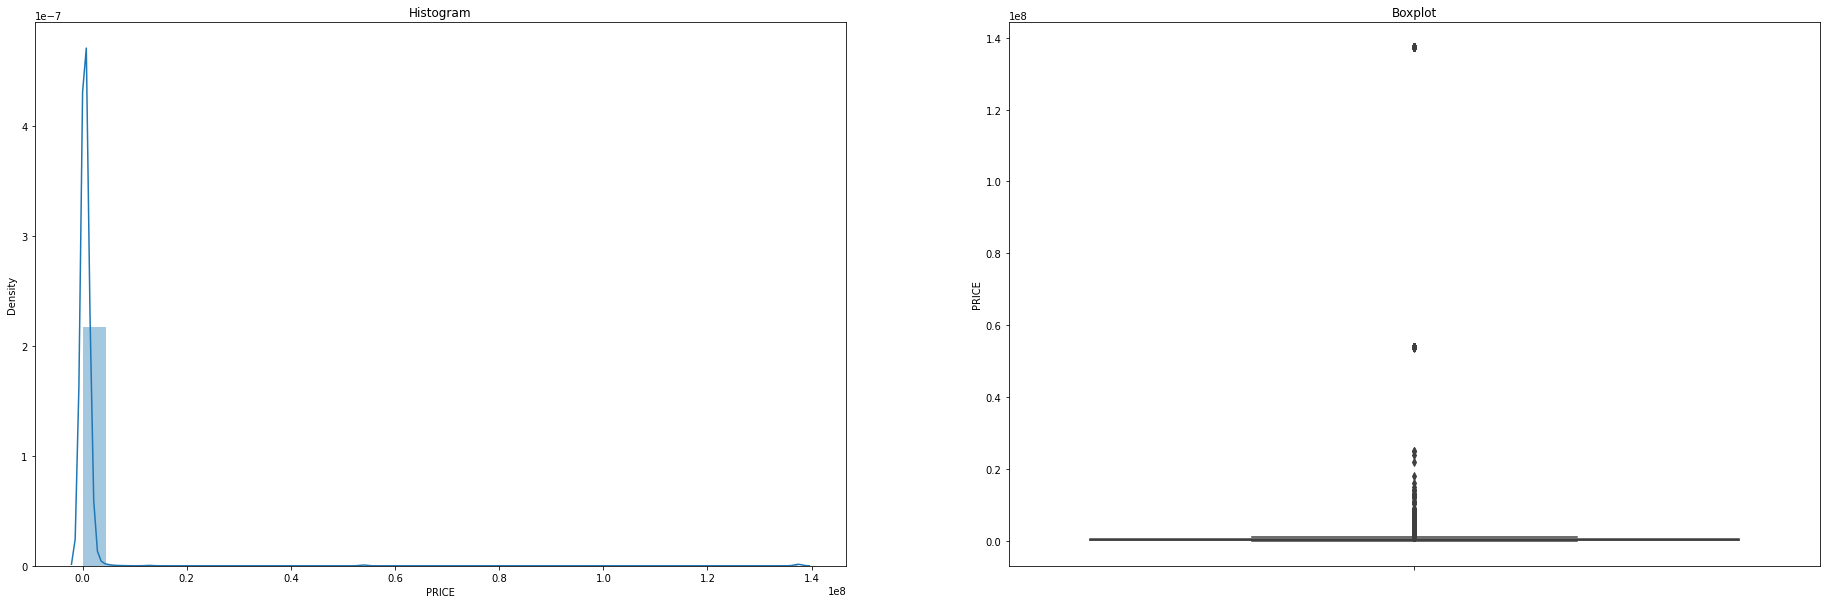

In [ ]:
diagnostic_plots(df,'PRICE')